# 📊 Real-World Statistics Project

This notebook will help you practice:
- Visualizing distributions
- Z-Test, T-Test, ANOVA, F-Test
- Using your real-world dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_excel('real_world_statistics_dataset.xlsx')
df.head()


,Employee_ID,Completed_Training,Deals_Closed,Customer_Complaints,Sales_Revenue,Cust_Satisfaction,Region,Group,Height_cm
0,E0001,1,7,1,5352.42,1.6,C,Treatment,165.7
1,E0002,0,6,1,6327.09,5.0,A,Control,164.6
2,E0003,0,4,2,5670.37,4.7,D,Control,176.3
3,E0004,1,5,3,6616.84,3.2,B,Control,165.5
4,E0005,1,7,2,6724.46,4.4,C,Treatment,180.2


## 🔎 Visualize Distributions

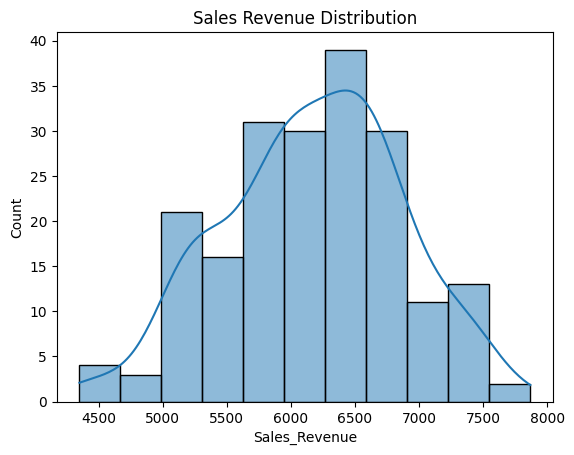

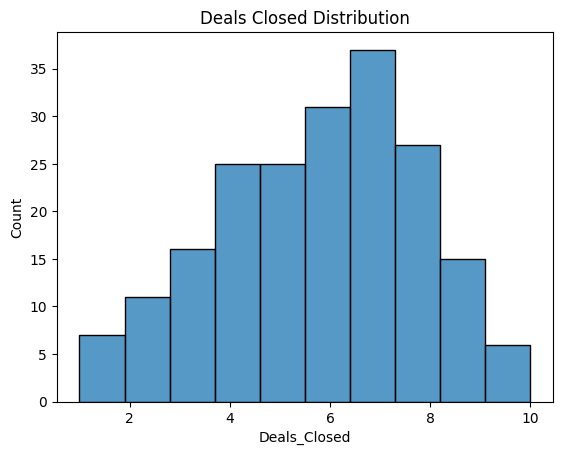

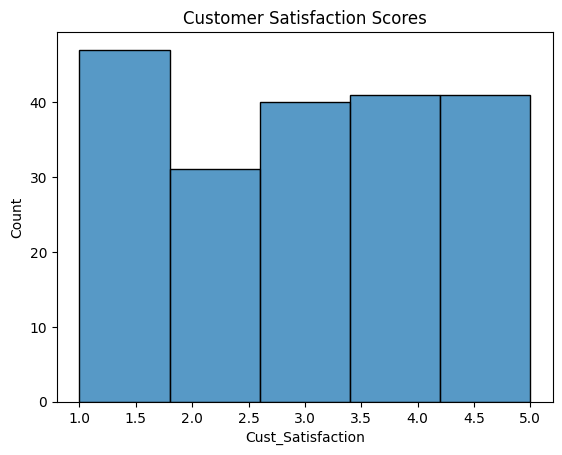

In [ ]:

# Histogram: Sales Revenue
sns.histplot(df['Sales_Revenue'], kde=True)
plt.title('Sales Revenue Distribution')
plt.show()

# Deals Closed Distribution
sns.histplot(df['Deals_Closed'], bins=10, kde=False)
plt.title('Deals Closed Distribution')
plt.show()

# Customer Satisfaction (Uniform)
sns.histplot(df['Cust_Satisfaction'], bins=5)
plt.title('Customer Satisfaction Scores')
plt.show()


## 📏 Z-Test Example: Are employee heights above 170cm?

In [ ]:

# Sample data
sample_mean = df['Height_cm'].mean()
n = len(df)

# Population parameters
pop_mean = 170   # Population mean (μ)
pop_std_dev = 10  # Population standard deviation (σ) — assumed known

# Z-Score calculation using population std dev
z_score = (sample_mean - pop_mean) / (pop_std_dev / np.sqrt(n))

# P-value (for one-tailed test)
p_value = 1 - stats.norm.cdf(z_score)

print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

Z-Score: 1.19
P-Value: 0.1180


## ✅ T-Test: Compare Sales Revenue between Control vs Treatment

In [ ]:

control = df[df['Group'] == 'Control']['Sales_Revenue']
treatment = df[df['Group'] == 'Treatment']['Sales_Revenue']

t_stat, p_val = stats.ttest_ind(control, treatment)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.4f}")


T-Statistic: -1.15
P-Value: 0.2501


## 🏆 ANOVA: Compare Sales Revenue across Regions

In [ ]:

anova = stats.f_oneway(
    df[df['Region'] == 'A']['Sales_Revenue'],
    df[df['Region'] == 'B']['Sales_Revenue'],
    df[df['Region'] == 'C']['Sales_Revenue'],
    df[df['Region'] == 'D']['Sales_Revenue']
)

print(f"F-Statistic: {anova.statistic:.2f}")
print(f"P-Value: {anova.pvalue:.4f}")


F-Statistic: 2.22
P-Value: 0.0874


## 🔥 F-Test: Test variance between Deals Closed in Region A vs B

In [ ]:

region_a = df[df['Region'] == 'A']['Deals_Closed']
region_b = df[df['Region'] == 'B']['Deals_Closed']

f_stat = np.var(region_a, ddof=1) / np.var(region_b, ddof=1)
dof1 = len(region_a) - 1
dof2 = len(region_b) - 1

p_val_f = 1 - stats.f.cdf(f_stat, dof1, dof2)

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_val_f:.4f}")


F-Statistic: 0.98
P-Value: 0.5211


In [ ]:
## 🎯 Chi-Square Test: Are Region and Group independent?

# Create contingency table
contingency = pd.crosstab(df['Region'], df['Group'])
print("Contingency Table:\n", contingency)

# Chi-Square Test
chi2_stat, p_val_chi, dof, expected = stats.chi2_contingency(contingency)

print(f"\nChi2 Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_val_chi:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))


Contingency Table:
 Group   Control  Treatment
Region                    
A            23         23
B            27         27
C            23         23
D            26         28

Chi2 Statistic: 0.05
P-Value: 0.9967
Degrees of Freedom: 3

Expected Frequencies:
 Group   Control  Treatment
Region                    
A         22.77      23.23
B         26.73      27.27
C         22.77      23.23
D         26.73      27.27
